# Practical 5: Neural Networks using TensorFlow

<a href="https://colab.research.google.com/github/huanfachen/DSSS_25/blob/main/sessions/W05_neural_networks/neural_networks_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this practical, we will introduce
[Tensorflow](https://www.tensorflow.org/guide/keras/overview) and use it
to:

1.  Build a simple two-layer neural network for digit recognition;
2.  Train and evaluate this neural network.

## Setting up Google Colab

As installing and configuring tensorflow on laptop can be a pain, we
recommend using Google Colab for this practical. Click
[here](https://colab.research.google.com/github/huanfachen/DSSS_25/blob/main/sessions/W05_neural_networks/neural_networks_practical.ipynb)
to run this practical on Google Colab, which requires a Google account.

Resource limit of Google Colab under free plan:

-   Memory: up to 12 GB.
-   Maximum duration of running a notebook: notebooks can run for at
    most **12 hours**, depending on availability and your usage
    patterns. (The notebook will die after at most 12 hours)
-   GPU duration: dynamic, up to a few hours. If you use GPU regularly,
    runtime durations will become shorter and shorter and disconnections
    more frequent.

*Very Important* - we will use the GPU on Google Colab to accelerate the
model training. To do this, go to ‘Runtime’ -\> ‘Change runtime type’
-\> Select ‘T4 GPU’ -\> Save. See below.

![](https://github.com/huanfachen/DSSS/blob/main/Figures/Colab_GPU_setting.jpg?raw=true)

If you are following along in your own development environment, rather
than Colab, see the [install guide](https://www.tensorflow.org/install)
for setting up TensorFlow for development.

Note: if you are using your own development environment, please make
sure you have upgraded to the latest `pip` before installing TensorFlow
2 package.

## Overview of TensorFlow

[TensorFlow](https://www.tensorflow.org/) is an open source library
developed by Google for numerical computation. It is particularly well
suited for large-scale machine learning.

TensorFlow is based on the construction of *computational graphs*. It
has evolved considerably since it’s open source release in 2015. We will
use TF2, which offers many additional features built on top of core
features (the most important is `tf.keras` discussed in later lectures).

### Features of TF

-   Similar to [`numpy`](https://numpy.org/doc/stable/) but with GPU
    support.
-   Supports distributed computing.
-   Includes a kind of just-in-time (JIT) compiler to optimise speed and
    memory usage.
-   Computational graphs can be saved and exported.
-   Supports autodiff and provides numerous advanced optimisers.

### TensorFlow’s Python API

<img src="images/tensorflow-Python-API.png" width="700px" style="display:block; margin:auto"/>

\[Credit: Geron\]

### TensorFlow’s Architecture

<img src="images/tensorflow-Architecture.png" width="700px" style="display:block; margin:auto"/>

\[Credit: Geron\]

At lowest level TensorFlow is implemented in C++ so that it is highly
efficient.

We will focus on the Python TensorFlow and Keras interfaces in this
practical. In real-world projects, if you use tensorflow, you will
simply interact with the Keras interface but sometimes you might want to
use the low-level python API for greater flexibility.

### Hardware

One of the factors responsible for the dramatic recent growth of machine
learning and AI is advances in computing power. In particular, GPU/TPU
hardware that supports high levels of parallelism.

<img src="images/cpu_gpu_tpu.png" width="750px" style="display:block; margin:auto"/>

-   **Central Processing Unit (CPU)**:
    -   General purpose
    -   Low latency
    -   Low throughput
    -   Sequential
-   **Graphics Processing Unit (GPU)**:
    -   Specialised (for graphics initially)
    -   High latency
    -   High throughput
    -   Parallel execution
-   **Tensor Processing Unit (TPU)**:
    -   Specialised for matrix operations
    -   High latency
    -   Very high throughput
    -   Extreme parallel execution

In TensorFlow many operations are implemented in low-level kernels,
optimised for specific hardware, e.g. CPUs, GPUs, or TPUs.

TensorFlow’s execution engine will ensure operations are run efficiently
(across multiple machines and devices if set up accordingly).

#### Aside: chips optimised for ML and AI are an active area of development

Key events of GPU: - 1999: NVIDIA released GeForce 256 (the first GPU),
originally for gaming tasks; - 2007: NVIDIA released CUDA (**Computing
Unified Device Architecture**), a software layer that allows software to
use the powerful processing capabilities of GPUs to perform tasks much
faster, including AI and gaming; - 2022: OpenAI launched ChatGPT, which
was trained on thousands of Nvidia A100 and H100 GPUs.

Google developed TPU in 2016.

[Graphcore](https://www.graphcore.ai/) developed the Intelligence
Processing Unit (IPU) in 2016.

[Groq](https://www.groq.com/) developed the Language Processing Unit
(LPU).

## Set up TensorFlow

Import TensorFlow into your programme to get started:

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

2026-02-11 15:29:31.207114: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-11 15:29:31.252749: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-11 15:29:32.731671: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.

TensorFlow version: 2.20.0

## Key data type: tensors

TensorFlow API centers around “Tensors” (essentially multi-dimensional
arrays of matrices), which are similar to numpy
[`ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

### Tensors

Can construct constant tensors with `tf.constant`.

In [2]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # 2x3 matrix

2026-02-11 15:29:33.313393: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

Tensors have a shape and data type (dtype).

In [4]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t.shape

TensorShape([2, 3])

In [5]:
t.dtype

tf.float32

### Indexing

Tensor indexing is very similar to numpy.

In [6]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[..., 1,  tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

### Operations

Variety of tensor operations are possible.

In [8]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
# square
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
# matrix multiplication
t @ tf.transpose(t) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

## Tensors and numpy ndarray

Tensors and ndarray are highly compatible, and we can create a tensor
from ndarray.

For the difference between tensors and ndarrays, see [tensors
documentation](https://www.tensorflow.org/guide/tensor#tensors-vs-numpy-arrays)
and [the geeksforgeeks
post](https://www.geeksforgeeks.org/deep-learning/pytorch-tensor-vs-numpy-array/).
I found the latter one more interesting and easier to understand.

In [11]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

Can convert tensor to ndarray.

In [12]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

Can apply numpy operations to tensors and vice versa.

In [13]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [14]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [15]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## Gradients

**Notes:** the section of ‘gradients’ is optional, and you don’t need to
understand it. However, we recommend you to read through it as it is key
to understanding how neural networks are trained under the hood.

When training neural networks using gradient descent based approaches,
we often need to compute the gradients, in particular, the gradient of
the cost function with respect to the model weights.

TensorFlow supports automatical differentiation, which allows gradients
to be computed automatically. We will compute gradients analytically,
numerically and using TensorFlow’s Autodiff functionality at the
following point.

Consider this function \$ f(w_1, w_2) \$ is defined as:

$$
f(w_1, w_2) = 3w_1^2 + 2w_1w_2
$$

In [16]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [17]:
# example of w1 and w2
w1, w2 = 5.0, 3.0

### Computing gradients analytically

In [18]:
def df_dw1(w1, w2):
    return 6 * w1 + 2 * w2
def df_dw2(w1, w2):
    return 2 * w1

In [19]:
df_dw1(w1, w2)

36.0

In [20]:
df_dw2(w1, w2)

10.0

If we compute the gradient analytically, we would need an extra function
evaluation for every gradient. Computationally infeasible for many
cases, e.g. large neural networks with hundreds of thousands or millions
of parameters.

### Computing gradients numerically

Compute the gradient by finite differences.

In [21]:
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [22]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

Note - the gradients computed numerically are approximate.

### Computing gradients with Autodiff

Autodiff builds derivatives of each stage of the computational graph so
that gradients can be computed automatically and efficiently.

In [23]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [24]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

Computing gradients with Autodiff only requires one computation,
regardless of how many derivatives need to be computed. The results do
not suffer from any numerical approximations, although it is limited by
machine precision arithmetic.

## Building a simple neural network using TF

We will build a 2-hidden layers fully connected neural network (a.k.a
multilayer perceptron) with TF. This example uses a low-level approach
to better understand all mechanics behind building neural networks and
the training process.

### Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

### MNIST Dataset Overview

We will train the neural network to identify MNIST handwritten digits.
The dataset contains 60,000 examples for training and 10,000 examples
for testing. The digits have been size-normalized and centered in a
fixed-size image (28x28 pixels) with values from 0 to 255.

In this example, each image will be converted to float32, normalized to
\[0, 1\] and flattened to a 1-D array of 784 features (28\*28).

<img src="http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png" alt="mnist" style="width: 400px;"/>

More info on MNIST can be found
[here](http://yann.lecun.com/exdb/mnist/).

In [25]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_feature_one_dimension = 28 # img shape: 28*28

# Training parameters.
# learning_rate = 0.1
# training_steps = 2000
# batch_size = 256
# display_step = 100

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).
Convert the sample data from integers to floating-point numbers:

In [26]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalisation - convert the sample data (range of 1-125) to floating numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

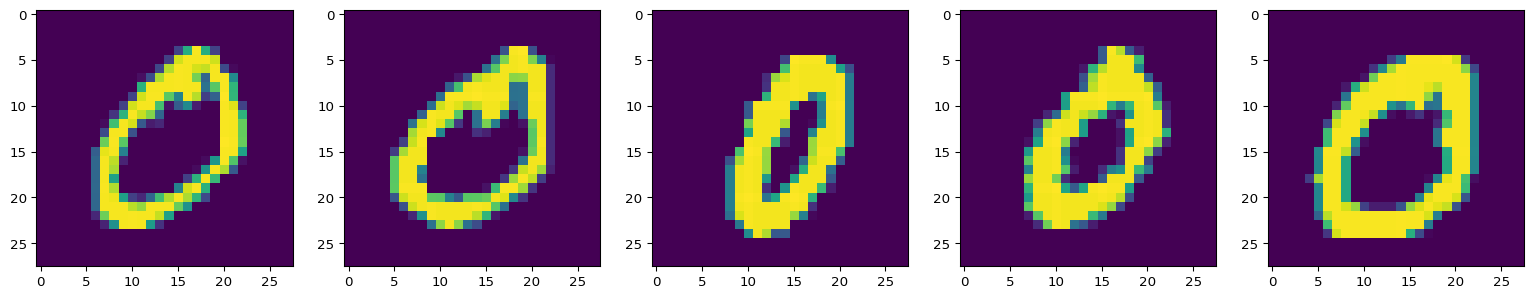

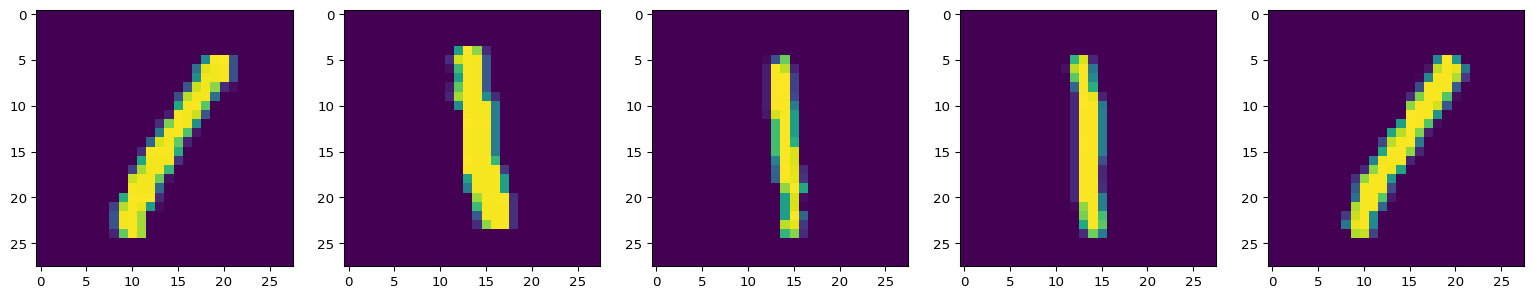

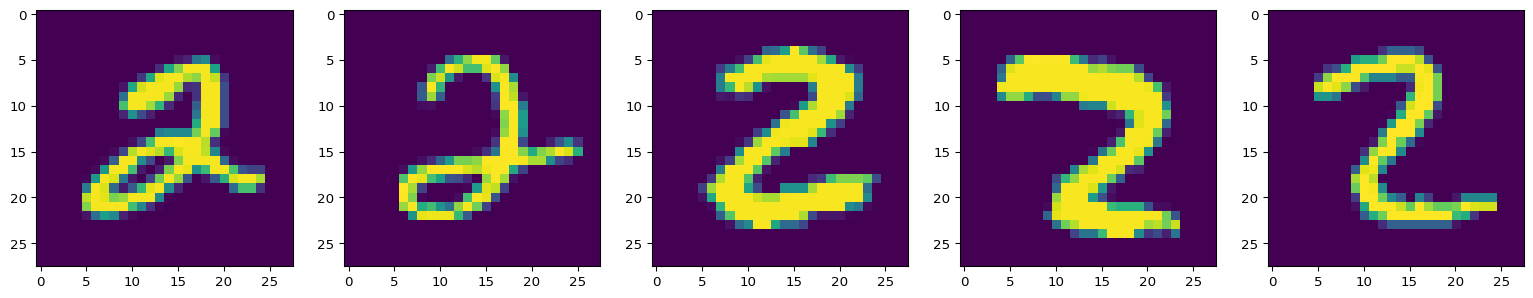

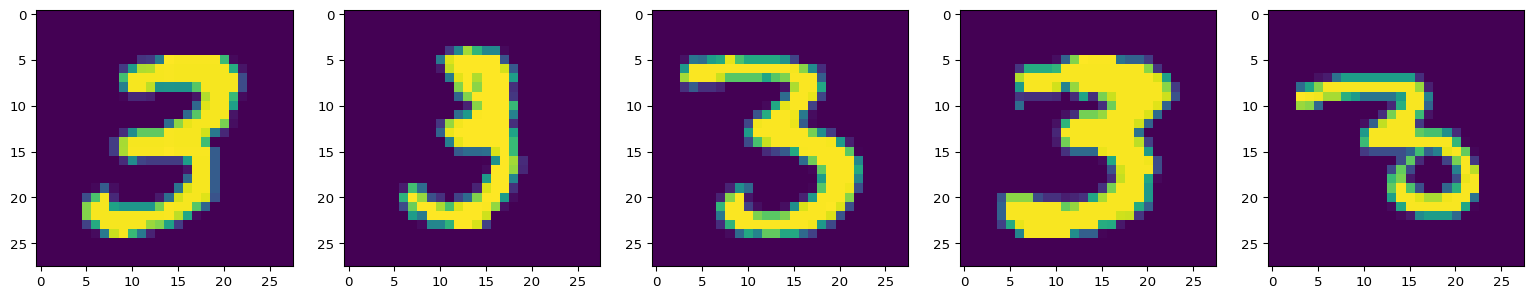

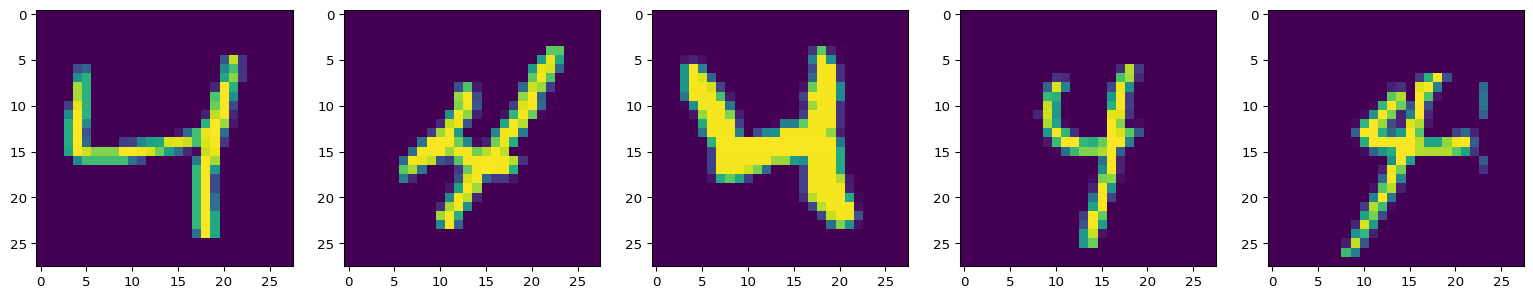

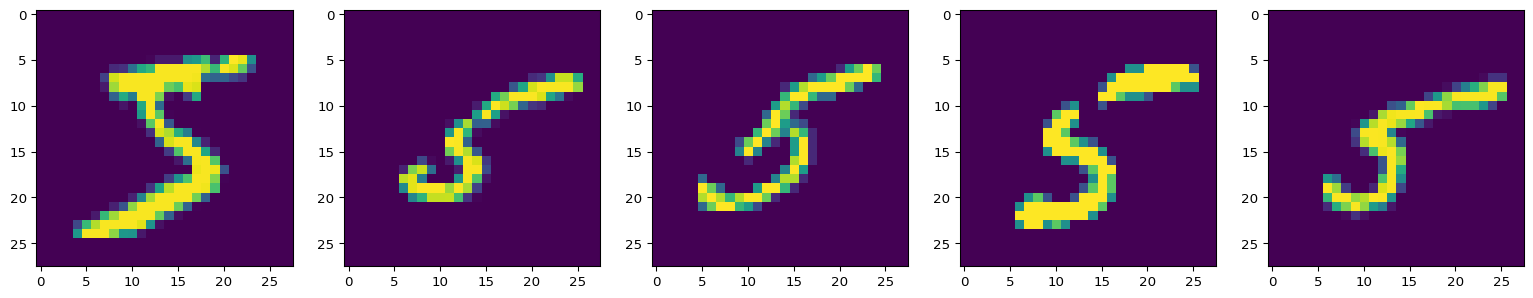

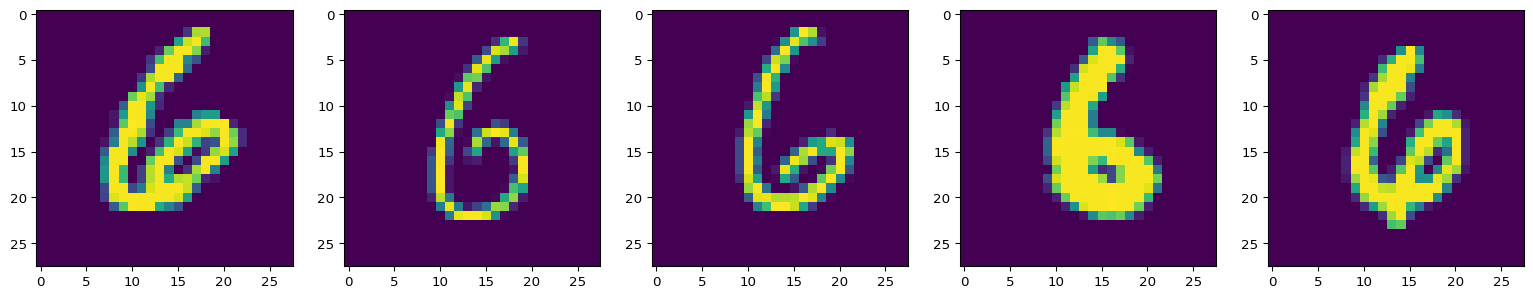

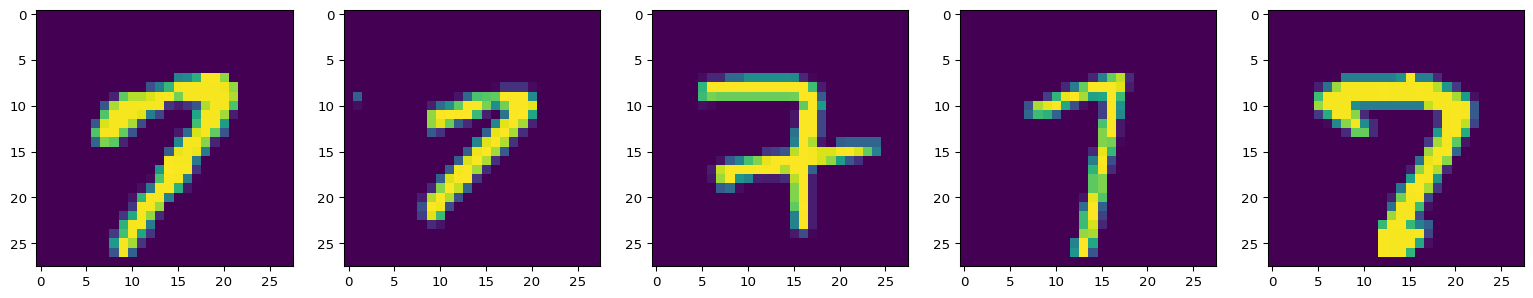

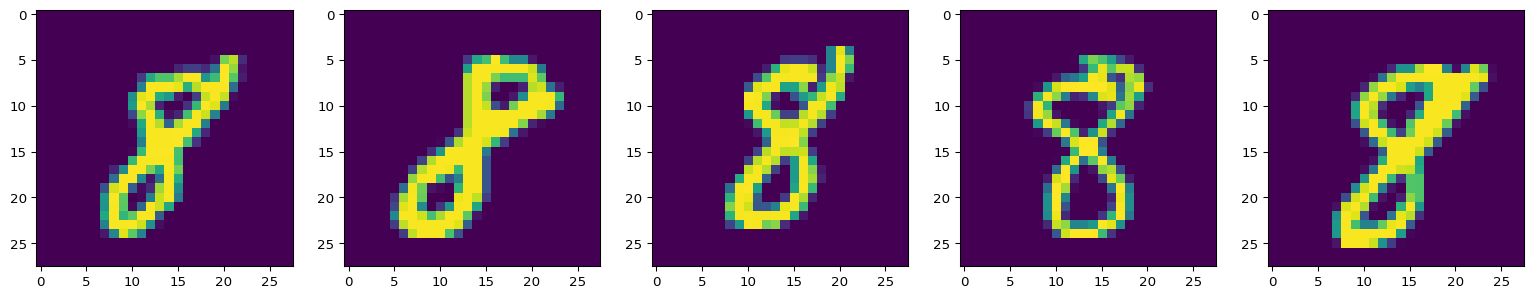

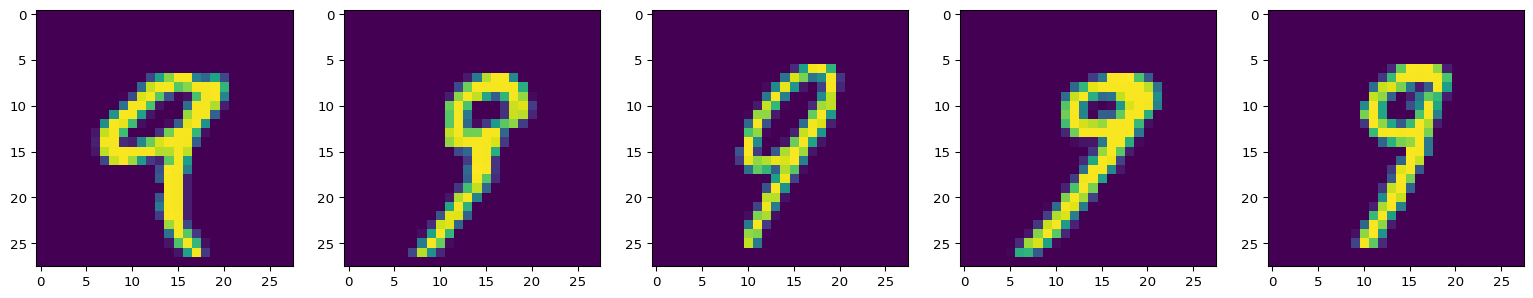

In [27]:
# function for visualising digits
def plot_num(number):

  item_index = np.where(y_train[:1000]==number)
  subset=x_train[item_index]

  egs=5
  fig, axs = plt.subplots(1,egs, figsize=(20,10))

  for i in range(0,egs):
    axs[i].imshow(subset[i])

for x in range(0,10):
  plot_num(x)

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

In [28]:
model = tf.keras.models.Sequential([
  # input layer (28*28), which is flattened before being fed into the neural network
  tf.keras.layers.Flatten(input_shape=(num_feature_one_dimension, num_feature_one_dimension)),
  # First fully-connected hidden layer.
  tf.keras.layers.Dense(n_hidden_1, activation='relu'),
  # Second fully-connected hidden layer.
  tf.keras.layers.Dense(n_hidden_2, activation='relu'),
  # output layer
  tf.keras.layers.Dense(num_classes)
])

/opt/hostedtoolcache/Python/3.10.19/x64/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

For each example, the model returns a vector of
[logits](https://developers.google.com/machine-learning/glossary#logits)
or
[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)
scores, one for each class.

In [29]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.2036095 ,  0.11847702,  0.27055177, -0.03575328, -0.195168  ,
        -0.15298524, -0.07948971,  0.2525871 , -0.06393878,  0.17260382]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities*
for each class:

In [30]:
tf.nn.softmax(predictions).numpy()

array([[0.11515013, 0.1057528 , 0.1231224 , 0.09063803, 0.07728186,
        0.08061155, 0.08675929, 0.1209303 , 0.08811902, 0.1116346 ]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the
activation function for the last layer of the network. While this can
make the model output more directly interpretable, this approach is
discouraged as it’s impossible to provide an exact and numerically
stable loss calculation for all models when using a softmax output.

Define a loss function for training using
`losses.SparseCategoricalCrossentropy`, which takes a vector of logits
and a `True` index and returns a scalar loss for each example.

In [31]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each
class), so the initial loss should be close to
`-tf.math.log(1/10) ~= 2.3`.

In [32]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.5181134)

Before you start training, configure and compile the model using Keras
`Model.compile`. Set the
[`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
class to `adam`, set the `loss` to the `loss_fn` function you defined
earlier, and specify a metric to be evaluated for the model by setting
the `metrics` parameter to `accuracy`.

In [33]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimise
the loss.

The `Model.fit` method trains the model for a fixed number of epochs
(iterations on a dataset). In this example, we will train the model for
10 epochs.

In the `Model.fit` method, the `verbose` parameter controls how much
output is printed during training:

-   `verbose=1`: Default. An animated progress bar for every single
    epoch (very noisy).
-   `verbose=0`: Silent. No output.
-   `verbose=2`: One line per epoch; shows the final stats for the epoch
    once it’s finished; much cleaner.

In [34]:
model.fit(x_train, y_train, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9338 - loss: 0.2194
Epoch 2/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9704 - loss: 0.0951
Epoch 3/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9789 - loss: 0.0676
Epoch 4/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9841 - loss: 0.0493
Epoch 5/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9870 - loss: 0.0401
Epoch 6/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9899 - loss: 0.0316
Epoch 7/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9906 - loss: 0.0289
Epoch 8/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9925 - loss: 0.0224
Epoch 9/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9933 - loss: 0.0201
Epoch 10/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9936 - loss: 0.0198

The `Model.evaluate` method checks the models performance, usually on a
[Validation
set](https://developers.google.com/machine-learning/glossary#validation-set)
or [Test
set](https://developers.google.com/machine-learning/glossary#test-set).

In [35]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9718 - loss: 0.1193

[0.11931346356868744, 0.9718000292778015]

The image classifier is now trained to ~98% accuracy on this dataset. To
learn more, read the [TensorFlow
tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained
model, and attach the softmax to it:

In [36]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

To check a random data point and prediction:

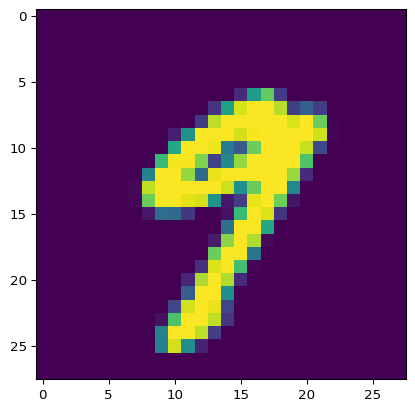

In [37]:
#probability_model(x_test[:1])
predictions=probability_model.predict(x_test)

index=20

print(np.argmax(predictions[index]))
plt.imshow(x_test[index])

## Conclusion

Congratulations! You have trained a machine learning model using a
prebuilt dataset using the
[Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the
[tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more
about building models with Keras, read the
[guides](https://www.tensorflow.org/guide/keras). If you want learn more
about loading and preparing data, see the tutorials on [image data
loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV
data loading](https://www.tensorflow.org/tutorials/load_data/csv).

## References and recommendations

1.  Some materials are from Machine Learning with Big Data (SPCE0038)
    module at UCL.